<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

def sum_prod(X, V):
    '''
    X - список матриц размером (n, n)
    V - список векторов размером (n, 1)
    Гарантируется, что len(X) == len(V)
    Возвращает сумму произведений матриц на векторы.
    '''
    if not X or not V:  # Если списки пусты
        return np.array([])  # Возвращаем пустой массив

    result = np.zeros_like(V[0])  # Инициализация результата нулевым вектором
    
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)  # Умножение матрицы на вектор и сложение
    
    return result

# Тестирование
class TestSumProd(unittest.TestCase):
    
    def test_zero_case(self):
        # Тестируем случай с нулевыми матрицами и векторами
        X = [np.zeros((2, 2)), np.zeros((2, 2))]
        V = [np.zeros((2, 1)), np.zeros((2, 1))]
        
        result = sum_prod(X, V)
        expected = np.zeros((2, 1))  # Ожидаемый результат — нулевой вектор
        np.testing.assert_array_equal(result, expected)
    
    def test_single_element_case(self):
        # Тестируем случай с одной матрицей и одним вектором
        X = [np.array([[2]])]
        V = [np.array([[3]])]
        
        result = sum_prod(X, V)
        expected = np.array([[6]])  # Ожидаемый результат: 2 * 3 = 6
        np.testing.assert_array_equal(result, expected)

    def test_empty_case(self):
        # Тестируем пустой случай
        X = []
        V = []
        
        result = sum_prod(X, V)
        expected = np.array([])  # Ожидаемый результат — пустой массив
        np.testing.assert_array_equal(result, expected)

unittest.main(argv=[''], verbosity=2, exit=False)


test_empty_case (__main__.TestSumProd) ... ok
test_single_element_case (__main__.TestSumProd) ... ok
test_zero_case (__main__.TestSumProd) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [16]:
import numpy as np
import unittest

def binarize(M, threshold=0.5):
    """
    Бинаризует матрицу M по заданному порогу threshold.
    Все значения, больше или равные threshold, становятся равными 1, остальные — 0.
    
    Параметры:
    M - матрица (numpy array)
    threshold - порог бинаризации (по умолчанию 0.5)
    
    Возвращает:
    бинаризованная матрица (numpy array)
    """
    # Используем условие для бинаризации матрицы
    return (M >= threshold).astype(int)

# Тестирование функции
class TestBinarizeFunction(unittest.TestCase):
    
    def test_basic_case(self):
        # Простой случай с порогом по умолчанию (0.5)
        M = np.array([[0.2, 0.6], [0.5, 0.8]])
        result = binarize(M)
        expected = np.array([[0, 1], [1, 1]])  # Ожидаемый результат
        np.testing.assert_array_equal(result, expected)
    
    def test_custom_threshold(self):
        # Тест с кастомным порогом
        M = np.array([[0.2, 0.6], [0.4, 0.8]])
        result = binarize(M, threshold=0.4)
        expected = np.array([[0, 1], [1, 1]])  # Ожидаемый результат
        np.testing.assert_array_equal(result, expected)
    
    def test_zero_threshold(self):
        # Тест с порогом 0 (все элементы >= 0)
        M = np.array([[-0.1, 0], [0.2, 0.8]])
        result = binarize(M, threshold=0)
        expected = np.array([[0, 1], [1, 1]])  # Ожидаемый результат
        np.testing.assert_array_equal(result, expected)
    
    def test_all_elements_below_threshold(self):
        # Тест, когда все элементы ниже порога
        M = np.array([[0.1, 0.2], [0.3, 0.4]])
        result = binarize(M, threshold=0.5)
        expected = np.array([[0, 0], [0, 0]])  # Ожидаемый результат
        np.testing.assert_array_equal(result, expected)
    
    def test_all_elements_above_threshold(self):
        # Тест, когда все элементы выше порога
        M = np.array([[0.6, 0.7], [0.8, 0.9]])
        result = binarize(M, threshold=0.5)
        expected = np.array([[1, 1], [1, 1]])  # Ожидаемый результат
        np.testing.assert_array_equal(result, expected)

unittest.main(argv=[''], verbosity=2, exit=False)


test_all_elements_above_threshold (__main__.TestBinarizeFunction) ... ok
test_all_elements_below_threshold (__main__.TestBinarizeFunction) ... ok
test_basic_case (__main__.TestBinarizeFunction) ... ok
test_custom_threshold (__main__.TestBinarizeFunction) ... ok
test_zero_threshold (__main__.TestBinarizeFunction) ... ok
test_empty_case (__main__.TestSumProd) ... ok
test_single_element_case (__main__.TestSumProd) ... ok
test_zero_case (__main__.TestSumProd) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.008s

OK


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [19]:
import numpy as np
import unittest

def unique_rows(mat):
    """
    Возвращает уникальные элементы для каждой строки матрицы.
    
    Параметры:
    mat - матрица (numpy array)
    
    Возвращает:
    Список массивов, где каждый массив содержит уникальные элементы строки.
    """
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    """
    Возвращает уникальные элементы для каждого столбца матрицы.
    
    Параметры:
    mat - матрица (numpy array)
    
    Возвращает:
    Список массивов, где каждый массив содержит уникальные элементы столбца.
    """
    return [np.unique(mat[:, col]) for col in range(mat.shape[1])]

# Тестирование функций
class TestUniqueElements(unittest.TestCase):
    
    def test_unique_rows(self):
        # Тест для уникальных элементов в строках
        mat = np.array([[1, 2, 2, 3], [4, 4, 5, 6], [7, 8, 7, 9]])
        result = unique_rows(mat)
        expected = [np.array([1, 2, 3]), np.array([4, 5, 6]), np.array([7, 8, 9])]
        for r, e in zip(result, expected):
            np.testing.assert_array_equal(r, e)
    
    def test_unique_columns(self):
        # Тест для уникальных элементов в столбцах
        mat = np.array([[1, 2, 2], [1, 3, 4], [5, 3, 4]])
        result = unique_columns(mat)
        expected = [np.array([1, 5]), np.array([2, 3]), np.array([2, 4])]
        for r, e in zip(result, expected):
            np.testing.assert_array_equal(r, e)
    
    def test_unique_rows_single_row(self):
        # Тест с одной строкой
        mat = np.array([[1, 1, 1, 1]])
        result = unique_rows(mat)
        expected = [np.array([1])]
        np.testing.assert_array_equal(result[0], expected[0])
    
    def test_unique_columns_single_column(self):
        # Тест с одним столбцом
        mat = np.array([[1], [1], [2], [3]])
        result = unique_columns(mat)
        expected = [np.array([1, 2, 3])]
        np.testing.assert_array_equal(result[0], expected[0])
    
unittest.main(argv=[''], verbosity=2, exit=False)

test_all_elements_above_threshold (__main__.TestBinarizeFunction) ... ok
test_all_elements_below_threshold (__main__.TestBinarizeFunction) ... ok
test_basic_case (__main__.TestBinarizeFunction) ... ok
test_custom_threshold (__main__.TestBinarizeFunction) ... ok
test_zero_threshold (__main__.TestBinarizeFunction) ... ok
test_empty_case (__main__.TestSumProd) ... ok
test_single_element_case (__main__.TestSumProd) ... ok
test_zero_case (__main__.TestSumProd) ... ok
test_unique_columns (__main__.TestUniqueElements) ... ok
test_unique_columns_single_column (__main__.TestUniqueElements) ... ok
test_unique_rows (__main__.TestUniqueElements) ... ok
test_unique_rows_single_row (__main__.TestUniqueElements) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.015s

OK


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

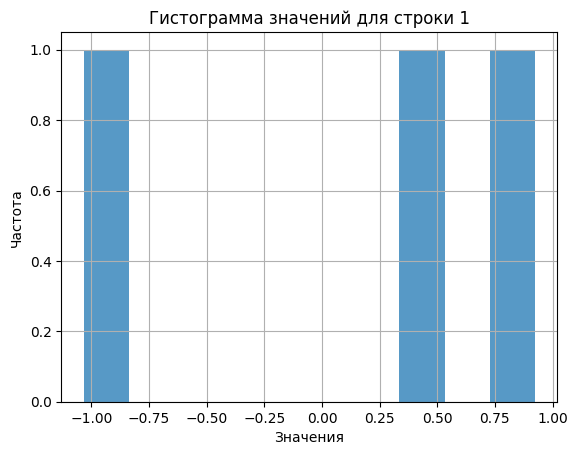

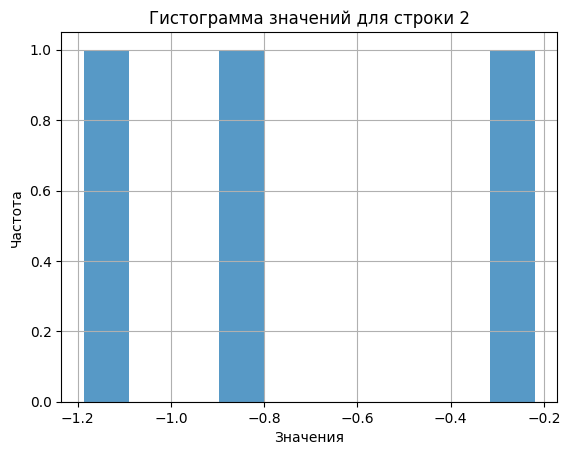

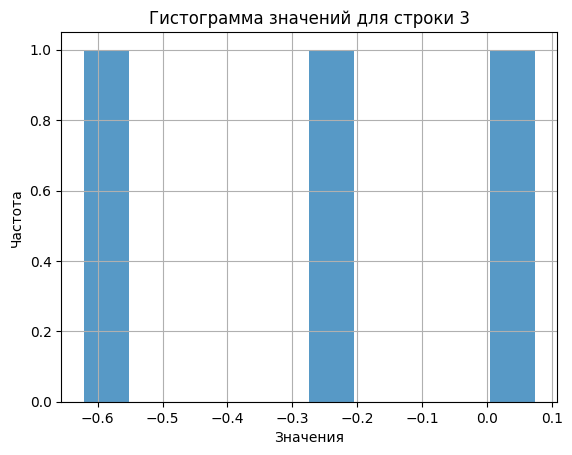

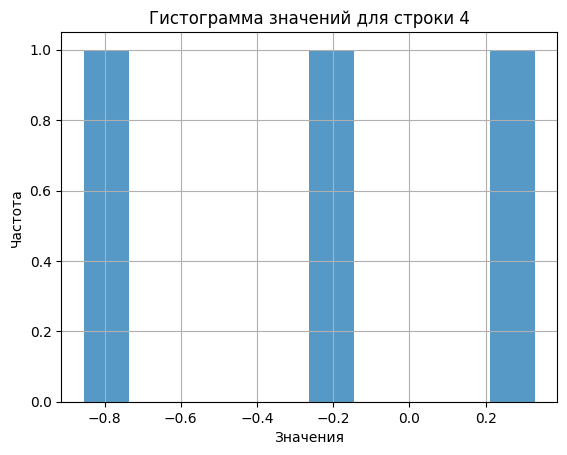

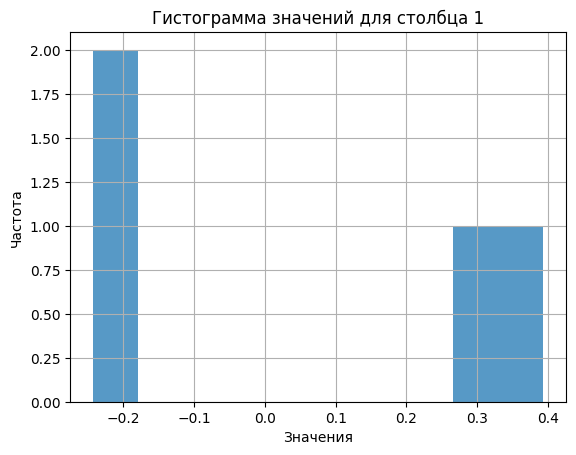

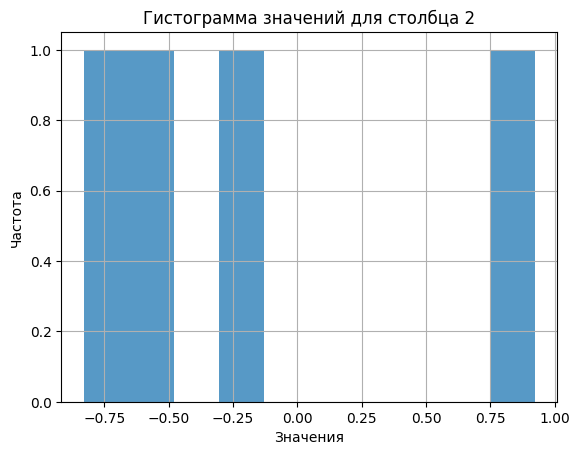

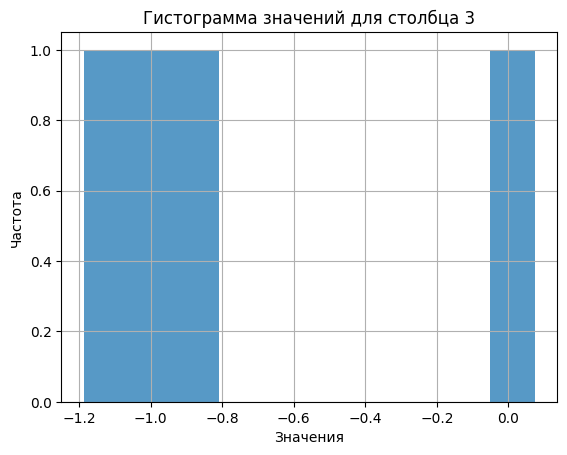

Математическое ожидание для строк: [ 0.09443046 -0.74557074 -0.26371132 -0.25875879]
Дисперсия для строк: [0.6821464  0.15932844 0.08065871 0.23320097]
Математическое ожидание для столбцов: [ 0.06468706 -0.19481532 -0.75007953]
Дисперсия для столбцов: [0.08840823 0.45937774 0.23992765]


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def random_matrix_stats(m, n):
    """
    Генерирует матрицу размером (m, n), заполненную случайными числами, распределенными по нормальному закону.
    Вычисляет математическое ожидание и дисперсию для каждой строки и столбца.
    Строит гистограммы значений для каждой строки и столбца.

    Параметры:
    m - количество строк
    n - количество столбцов

    Возвращает:
    mean_rows - математическое ожидание для каждой строки
    var_rows - дисперсия для каждой строки
    mean_columns - математическое ожидание для каждого столбца
    var_columns - дисперсия для каждого столбца
    """
    # Генерация матрицы случайных чисел с нормальным распределением
    mat = np.random.randn(m, n)

    # Вычисление мат. ожидания и дисперсии для строк
    mean_rows = np.mean(mat, axis=1)
    var_rows = np.var(mat, axis=1)

    # Вычисление мат. ожидания и дисперсии для столбцов
    mean_columns = np.mean(mat, axis=0)
    var_columns = np.var(mat, axis=0)

    # Построение гистограмм для строк
    for i in range(m):
        plt.hist(mat[i, :], bins=10, alpha=0.75)
        plt.title(f"Гистограмма значений для строки {i+1}")
        plt.xlabel("Значения")
        plt.ylabel("Частота")
        plt.grid(True)
        plt.show()

    # Построение гистограмм для столбцов
    for j in range(n):
        plt.hist(mat[:, j], bins=10, alpha=0.75)
        plt.title(f"Гистограмма значений для столбца {j+1}")
        plt.xlabel("Значения")
        plt.ylabel("Частота")
        plt.grid(True)
        plt.show()

    return mean_rows, var_rows, mean_columns, var_columns

# Пример использования функции
m = 4  # количество строк
n = 3  # количество столбцов
mean_rows, var_rows, mean_columns, var_columns = random_matrix_stats(m, n)

print("Математическое ожидание для строк:", mean_rows)
print("Дисперсия для строк:", var_rows)
print("Математическое ожидание для столбцов:", mean_columns)
print("Дисперсия для столбцов:", var_columns)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [27]:
import numpy as np
import unittest

def chess(m, n, a, b):
    """
    Создает матрицу размером (m, n) в шахматном порядке,
    используя заданные числа a и b.

    Параметры:
    m - количество строк
    n - количество столбцов
    a - первое число для заполнения
    b - второе число для заполнения

    Возвращает:
    матрицу размером (m, n) в шахматном порядке
    """
    # Инициализируем матрицу нулями размером (m, n)
    mat = np.zeros((m, n))
    
    # Проходим по каждой ячейке матрицы
    for i in range(m):  # Проход по строкам
        for j in range(n):  # Проход по столбцам
            # Проверяем, четная ли сумма индексов
            if (i + j) % 2 == 0:
                mat[i, j] = a  # Если четная, заполняем числом a
            else:
                mat[i, j] = b  # Если нечетная, заполняем числом b
                
    return mat  # Возвращаем заполненную матрицу

# Тестирование функции
class TestChessMatrix(unittest.TestCase):

    def test_basic_case(self):
        # Проверяем базовый случай с размером 3x3
        expected = np.array([[1, 2, 1], 
                             [2, 1, 2], 
                             [1, 2, 1]])
        result = chess(3, 3, 1, 2)
        np.testing.assert_array_equal(result, expected)  # Сравниваем с ожидаемым результатом

    def test_even_dimensions(self):
        # Проверяем матрицу 2x2
        expected = np.array([[1, 2], 
                             [2, 1]])
        result = chess(2, 2, 1, 2)
        np.testing.assert_array_equal(result, expected)  # Сравниваем с ожидаемым результатом

    def test_odd_dimensions(self):
        # Проверяем матрицу 2x4
        expected = np.array([[1, 2, 1, 2], 
                             [2, 1, 2, 1]])
        result = chess(2, 4, 1, 2)
        np.testing.assert_array_equal(result, expected)  # Сравниваем с ожидаемым результатом

    def test_single_element(self):
        # Проверяем случай, когда матрица имеет только один элемент
        expected = np.array([[1]])
        result = chess(1, 1, 1, 2)
        np.testing.assert_array_equal(result, expected)  # Сравниваем с ожидаемым результатом

    def test_all_b_values(self):
        # Проверяем случай, когда все элементы должны быть равны b
        expected = np.array([[2, 2], 
                             [2, 2]])
        result = chess(2, 2, 2, 2)
        np.testing.assert_array_equal(result, expected)  # Сравниваем с ожидаемым результатом

unittest.main(argv=[''], verbosity=2, exit=False)


test_all_elements_above_threshold (__main__.TestBinarizeFunction) ... ok
test_all_elements_below_threshold (__main__.TestBinarizeFunction) ... ok
test_basic_case (__main__.TestBinarizeFunction) ... ok
test_custom_threshold (__main__.TestBinarizeFunction) ... ok
test_zero_threshold (__main__.TestBinarizeFunction) ... ok
test_all_b_values (__main__.TestChessMatrix) ... ok
test_basic_case (__main__.TestChessMatrix) ... ok
test_even_dimensions (__main__.TestChessMatrix) ... ok
test_odd_dimensions (__main__.TestChessMatrix) ... ok
test_single_element (__main__.TestChessMatrix) ... ok
test_empty_case (__main__.TestSumProd) ... ok
test_single_element_case (__main__.TestSumProd) ... ok
test_zero_case (__main__.TestSumProd) ... ok
test_unique_columns (__main__.TestUniqueElements) ... ok
test_unique_columns_single_column (__main__.TestUniqueElements) ... ok
test_unique_rows (__main__.TestUniqueElements) ... ok
test_unique_rows_single_row (__main__.TestUniqueElements) ... ok

--------------------

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

test_draw_ellipse_color (__main__.TestDrawFunctions) ... C:\Users\Ашот\AppData\Local\Temp\ipykernel_5064\72298712.py:80: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


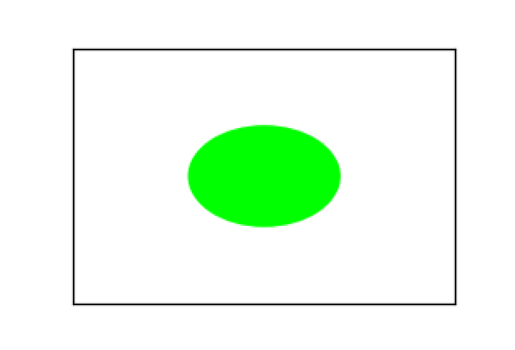

ok
test_draw_ellipse_size (__main__.TestDrawFunctions) ... 

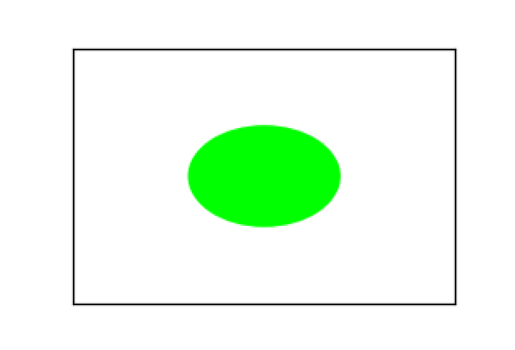

ok
test_draw_rectangle_color (__main__.TestDrawFunctions) ... C:\Users\Ашот\AppData\Local\Temp\ipykernel_5064\72298712.py:40: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


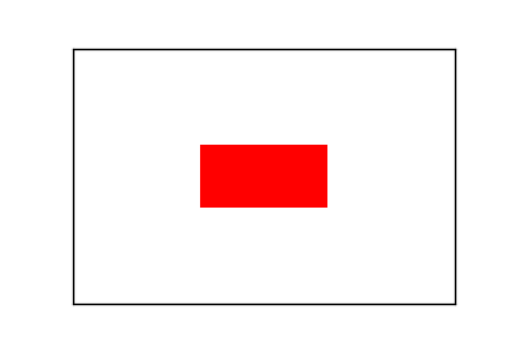

ok
test_draw_rectangle_size (__main__.TestDrawFunctions) ... 

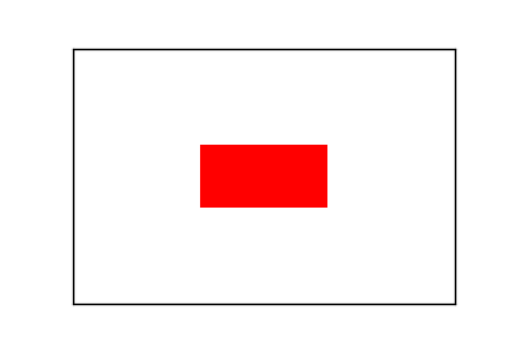

ok

----------------------------------------------------------------------
Ran 4 tests in 0.209s

OK


In [6]:
import unittest
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image

# Функция для нормализации цвета из диапазона [0-255] в диапазон [0-1]
def normalize_color(color):
    return tuple(c / 255 for c in color)

# Функция для рисования прямоугольника
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    """
    Функция создает изображение размером m x n с прямоугольником размером a x b.
    Прямоугольник центрируется на изображении.
    Цвет прямоугольника и фона задаются параметрами rectangle_color и background_color.
    Возвращает изображение в виде массива numpy для проверки тестами.
    """
    # Создание полотна для рисунка
    fig, ax = plt.subplots(figsize=(m / 100, n / 100))  # Устанавливаем размер в дюймах

    # Устанавливаем цвет фона
    ax.set_facecolor(normalize_color(background_color))

    # Добавляем прямоугольник
    rect = patches.Rectangle(((m - a) // 2, (n - b) // 2), a, b, linewidth=1, edgecolor='none', facecolor=normalize_color(rectangle_color))
    ax.add_patch(rect)

    # Настраиваем границы холста
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)

    # Убираем оси и метки
    ax.set_xticks([])  
    ax.set_yticks([])  
    ax.set_aspect('equal')

    # Рисуем изображение и преобразуем его в массив numpy
    fig.canvas.draw()
    img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)

    # Отображаем изображение
    plt.imshow(img)
    plt.axis('off')  # Отключаем оси
    plt.show()

    return img  # Возвращаем изображение для тестирования

# Функция для рисования эллипса (овала)
def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    """
    Функция создает изображение размером m x n с овалом (эллипсом) с полуосями a и b.
    Овал центрируется на изображении.
    Цвет эллипса и фона задаются параметрами ellipse_color и background_color.
    Возвращает изображение в виде массива numpy для проверки тестами.
    """
    # Создаем полотно для рисунка
    fig, ax = plt.subplots(figsize=(m / 100, n / 100))  # Устанавливаем размер в дюймах

    # Устанавливаем цвет фона
    ax.set_facecolor(normalize_color(background_color))

    # Добавляем эллипс (овал)
    ellipse = patches.Ellipse((m // 2, n // 2), 2 * a, 2 * b, linewidth=1, edgecolor='none', facecolor=normalize_color(ellipse_color))
    ax.add_patch(ellipse)

    # Настраиваем границы холста
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)

    # Убираем оси и метки
    ax.set_xticks([])  
    ax.set_yticks([])  
    ax.set_aspect('equal')

    # Рисуем изображение и преобразуем его в массив numpy
    fig.canvas.draw()
    img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)

    # Отображаем изображение
    plt.imshow(img)
    plt.axis('off')  # Отключаем оси
    plt.show()

    return img  # Возвращаем изображение для тестирования

# Тесты для функций рисования
class TestDrawFunctions(unittest.TestCase):

    # Тестируем размер изображения с прямоугольником
    def test_draw_rectangle_size(self):
        a, b = 100, 50  # Размеры прямоугольника
        m, n = 300, 200  # Размеры изображения
        img = draw_rectangle(a, b, m, n, rectangle_color=(255, 0, 0), background_color=(255, 255, 255))
        # Проверяем, что размеры изображения совпадают с ожидаемыми (n, m, 3)
        self.assertEqual(img.shape, (n, m, 3))

    # Тестируем правильность цвета прямоугольника в центре
    def test_draw_rectangle_color(self):
        a, b = 100, 50  # Размеры прямоугольника
        m, n = 300, 200  # Размеры изображения
        img = draw_rectangle(a, b, m, n, rectangle_color=(255, 0, 0), background_color=(255, 255, 255))
        
        # Центр изображения должен быть внутри прямоугольника и иметь красный цвет
        center_x, center_y = m // 2, n // 2
        self.assertTrue(np.all(img[center_y, center_x] == [255, 0, 0]))  # Проверка, что пиксели в центре красные

    # Тестируем размер изображения с эллипсом
    def test_draw_ellipse_size(self):
        a, b = 60, 40  # Полуоси эллипса
        m, n = 300, 200  # Размеры изображения
        img = draw_ellipse(a, b, m, n, ellipse_color=(0, 255, 0), background_color=(255, 255, 255))
        # Проверяем, что размеры изображения совпадают с ожидаемыми (n, m, 3)
        self.assertEqual(img.shape, (n, m, 3))

    # Тестируем правильность цвета эллипса в центре
    def test_draw_ellipse_color(self):
        a, b = 60, 40  # Полуоси эллипса
        m, n = 300, 200  # Размеры изображения
        img = draw_ellipse(a, b, m, n, ellipse_color=(0, 255, 0), background_color=(255, 255, 255))

        # Центр изображения должен быть внутри эллипса и иметь зеленый цвет
        center_x, center_y = m // 2, n // 2
        self.assertTrue(np.all(img[center_y, center_x] == [0, 255, 0]))  # Проверка, что пиксели в центре зеленые

unittest.main(argv=[''], verbosity=2, exit=False)


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

Математическое ожидание: 2.5453977359077906
Дисперсия: 258.1185021000202
Среднеквадратическое отклонение: 16.06606678997757


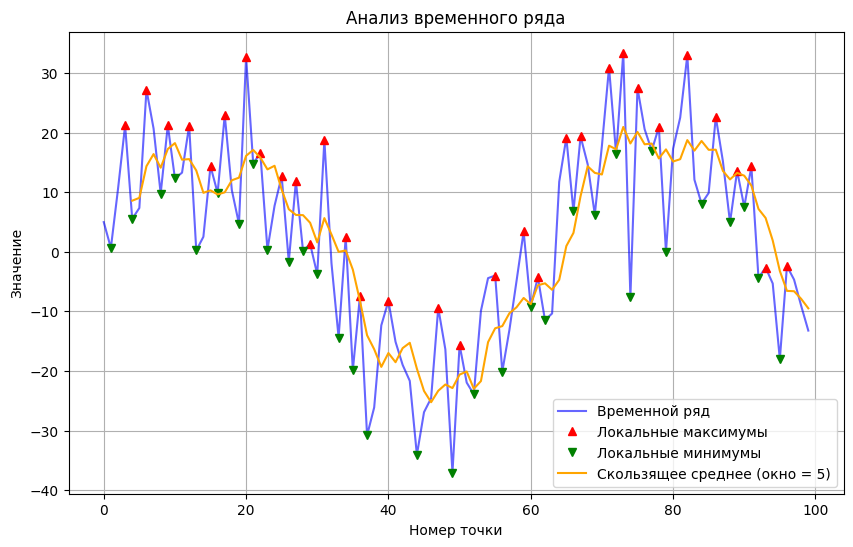

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Функция для нахождения математического ожидания, дисперсии и СКО
def calculate_statistics(time_series):
    mean_value = np.mean(time_series)
    variance = np.var(time_series)
    std_dev = np.std(time_series)
    return mean_value, variance, std_dev

# Функция для нахождения локальных максимумов и минимумов
def find_local_extrema(time_series):
    # Нахождение индексов локальных максимумов
    peaks, _ = find_peaks(time_series)
    # Нахождение индексов локальных минимумов (инвертируем ряд и ищем максимумы)
    troughs, _ = find_peaks(-time_series)
    return peaks, troughs

# Функция для вычисления скользящего среднего
def moving_average(time_series, window_size):
    return np.convolve(time_series, np.ones(window_size)/window_size, mode='valid')

# Функция для построения одного объединенного графика
def plot_series_combined(time_series, peaks, troughs, moving_avg, window_size):
    plt.figure(figsize=(10, 6))
    
    # График временного ряда
    plt.plot(time_series, label='Временной ряд', color='blue', alpha=0.6)
    
    # Локальные максимумы
    plt.plot(peaks, time_series[peaks], 'r^', label='Локальные максимумы')
    
    # Локальные минимумы
    plt.plot(troughs, time_series[troughs], 'gv', label='Локальные минимумы')
    
    # График скользящего среднего
    plt.plot(range(window_size - 1, len(time_series)), moving_avg, label=f'Скользящее среднее (окно = {window_size})', color='orange')

    # Добавление подписей и легенды на русском языке
    plt.title('Анализ временного ряда')
    plt.xlabel('Номер точки')
    plt.ylabel('Значение')
    plt.legend()

    # Отображение графика
    plt.grid(True)
    plt.show()

# Основная функция для анализа временного ряда
def analyze_time_series(time_series, window_size):
    # Статистические характеристики
    mean_value, variance, std_dev = calculate_statistics(time_series)
    
    print(f'Математическое ожидание: {mean_value}')
    print(f'Дисперсия: {variance}')
    print(f'Среднеквадратическое отклонение: {std_dev}')
    
    # Локальные максимумы и минимумы
    peaks, troughs = find_local_extrema(time_series)
    
    # Скользящее среднее
    moving_avg = moving_average(time_series, window_size)
    
    # Построение объединенного графика
    plot_series_combined(time_series, peaks, troughs, moving_avg, window_size)

# Пример использования
# Сгенерируем случайный временной ряд для примера
np.random.seed(42)
time_series = np.random.randn(100) * 10 + np.sin(np.linspace(0, 10, 100)) * 20

# Размер окна для скользящего среднего
window_size = 5

# Анализируем временной ряд
analyze_time_series(time_series, window_size)


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [12]:
import numpy as np

# Функция для выполнения one-hot encoding
def one_hot_encode(labels):
    # Определяем количество классов
    num_classes = max(labels) + 1  # Максимальная метка + 1, так как метки начинаются с 0
    # Создаем матрицу, где для каждой метки будет стоять 1 в соответствующей позиции
    one_hot_encoded = np.eye(num_classes)[labels]
    return one_hot_encoded

# Примеры использования функции с различными векторами меток классов

# Пример 1: Вектор с метками классов от 0 до 3
labels1 = [0, 2, 3, 0]
one_hot_result1 = one_hot_encode(labels1)
print("Пример 1: One-hot encoding для [0, 2, 3, 0]:")
print(one_hot_result1)
print()

# Пример 2: Вектор с метками классов от 0 до 1 (два класса)
labels2 = [0, 1, 1, 0]
one_hot_result2 = one_hot_encode(labels2)
print("Пример 2: One-hot encoding для [0, 1, 1, 0]:")
print(one_hot_result2)
print()

# Пример 3: Вектор с метками классов, содержащими только один класс
labels3 = [0, 0, 0, 0]
one_hot_result3 = one_hot_encode(labels3)
print("Пример 3: One-hot encoding для [0, 0, 0, 0]:")
print(one_hot_result3)
print()

# Пример 4: Вектор с метками классов от 0 до 5 (шесть классов)
labels4 = [0, 1, 2, 3, 4, 5]
one_hot_result4 = one_hot_encode(labels4)
print("Пример 4: One-hot encoding для [0, 1, 2, 3, 4, 5]:")
print(one_hot_result4)
print()

Пример 1: One-hot encoding для [0, 2, 3, 0]:
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]

Пример 2: One-hot encoding для [0, 1, 1, 0]:
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]

Пример 3: One-hot encoding для [0, 0, 0, 0]:
[[1.]
 [1.]
 [1.]
 [1.]]

Пример 4: One-hot encoding для [0, 1, 2, 3, 4, 5]:
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]

